# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [32]:
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

%matplotlib inline
plt.rc('figure', figsize=(6, 4))

In [4]:
tips = pd.read_csv('tips.csv')

In [5]:
tips

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size,porcent_tip,net_bill,y_pred
0,0,16.99,1.01,Female,No,Sun,Dinner,2,-0.063204,15.98,2.360495
1,1,10.34,1.66,Male,No,Sun,Dinner,3,-0.191244,8.68,1.957671
2,2,21.01,3.50,Male,No,Sun,Dinner,3,-0.199886,17.51,3.078562
3,3,23.68,3.31,Male,No,Sun,Dinner,2,-0.162494,20.37,3.285872
4,4,24.59,3.61,Female,No,Sun,Dinner,4,-0.172069,20.98,3.398096
...,...,...,...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3,-0.256166,23.11,3.986286
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2,-0.079428,25.18,3.556334
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2,-0.096759,20.67,3.068089
242,242,17.82,1.75,Male,No,Sat,Dinner,2,-0.108899,16.07,2.548647


### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

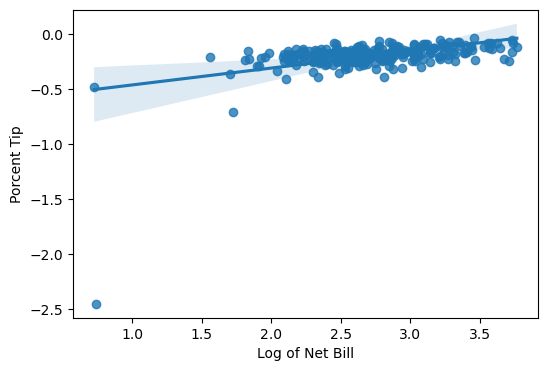

In [46]:
# Calcular o logaritmo de net_bill (evitar log(0) adicionando um pequeno valor)
tips['log_net_bill'] = np.log(tips['net_bill'] + 1e-10)

# Ajustar o modelo de regressão com statsmodels
model = smf.ols('porcent_tip ~ log_net_bill', data=tips).fit()

# Visualizar a regressão com regplot
sns.regplot(data=tips, x='log_net_bill', y='porcent_tip')

# Adicionar rótulos aos eixos
plt.xlabel('Log of Net Bill')
plt.ylabel('Porcent Tip')
plt.show()



###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

R²: 0.20172884237357547


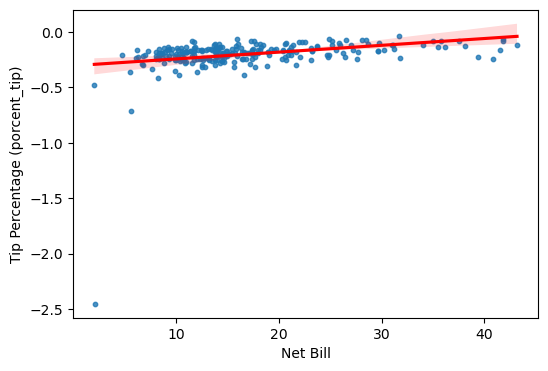

In [59]:
# Criar o polinômio de segundo grau para net_bill
tips['net_bill_squared'] = tips['net_bill'] ** 2

# Ajustar o modelo de regressão com statsmodels (tip_pct ~ net_bill + net_bill^2)
model_poli = smf.ols('porcent_tip ~ net_bill + net_bill_squared', data=tips).fit()

# Visualizar a regressão com regplot
sns.regplot(data=tips, x='net_bill', y='porcent_tip', scatter_kws={'s': 10}, line_kws={'color': 'red'})

# Adicionar rótulos aos eixos
plt.xlabel('Net Bill')
plt.ylabel('Tip Percentage (porcent_tip)')
plt.show()



###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [61]:
# Obter o R²
r_squared = model.rsquared
print(f'R²: {r_squared}')

R²: 0.20172884237357547


###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [63]:
# Obter o R²
r_squared = reg_tips.rsquared
print(f'R²: {r_squared}')

R²: 0.8866564305863217


###  6. qual modelo resultou no melhor ajuste?

In [ ]:
Elevar o X ao segundo grau resultou em um melhor ajuste das variaveis.